
# Analyzing Marketing and Sales Data

#### This dataset was gathered from kaggle.com
#### By Daniel Payan

In this notebook, we will **manipulate**, **analyze**, and **visualize** data from a business dataset containing information, such as, different marketing budgets and their corresponding sales. We will utilize this data to draw insights into what **marketing was most effective on sales, and how to best allocate the marketing budget.**

This notebook has one CSV file, ***Marketing_and_Sales_Data.csv***, which will be stored using a pandas DataFrame. For data visualization we will be using seaborn and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Read data into pandas DataFrame

budget_df = pd.read_csv('Data/Marketing_and_Sales_Data.csv')

#The dataset has 4572 records with 5 attributes
budget_df.shape

(4572, 5)

#### First, let's display the dataset to get an overall look at our data.
(All of our values are in millions of USD)

In [3]:
budget_df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


#### Here we get attribute info, in which we see we have:
> 1 categorical (object) attributes <br> &<br> 4 numerical (float/int) attributes.

In [4]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
budget_df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
#We see we have some missing values, so we'll 
#drop those rows for simplicity sake
budget_df.dropna(inplace=True)
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


#### Let's plot the distributions of the budgets and sales

[Text(0.5, 1.0, 'Distribution of Budget on TV Marketing (In Millions of USD)')]

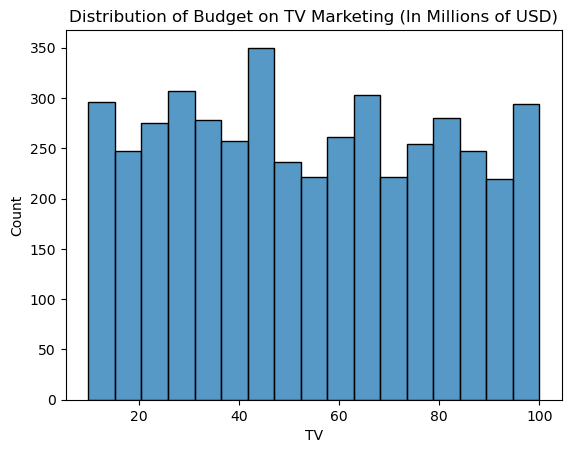

In [7]:
sb.histplot(data=budget_df,x='TV').set(title='Distribution of Budget on TV Marketing (In Millions of USD)')

[Text(0.5, 1.0, 'Distribution of Budget on Radio Marketing (In Millions of USD)')]

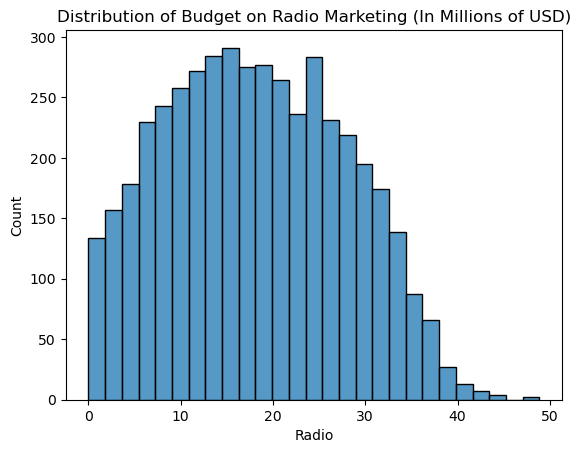

In [8]:
sb.histplot(data=budget_df,x='Radio').set(title='Distribution of Budget on Radio Marketing (In Millions of USD)')

[Text(0.5, 1.0, 'Distribution of Budget on Social Media Marketing (In Millions of USD)')]

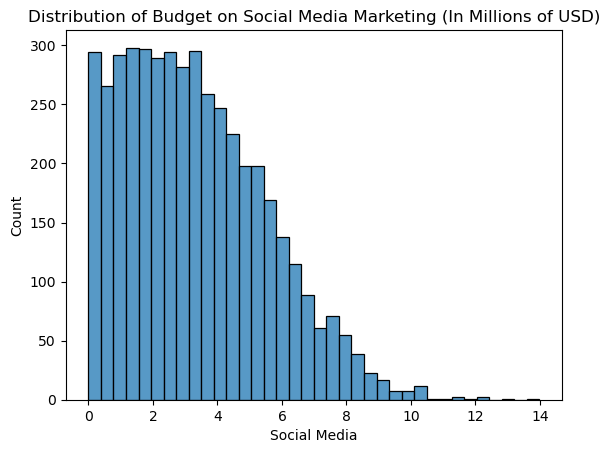

In [9]:
sb.histplot(data=budget_df,x='Social Media').set(title='Distribution of Budget on Social Media Marketing (In Millions of USD)')

[Text(0.5, 1.0, 'Distribution of Promotion Collaboration')]

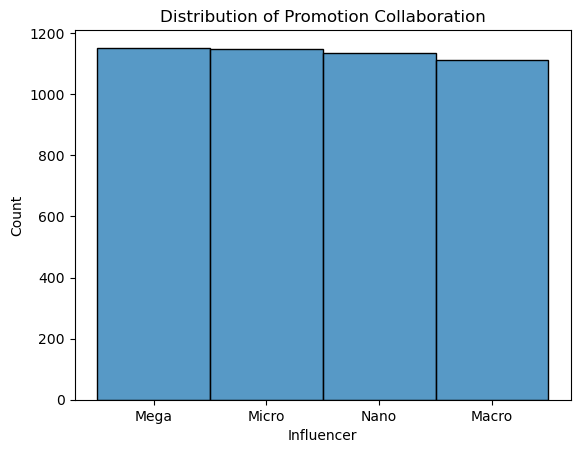

In [10]:
sb.histplot(data=budget_df,x='Influencer').set(title='Distribution of Promotion Collaboration')

[Text(0.5, 1.0, 'Distribution of Sales')]

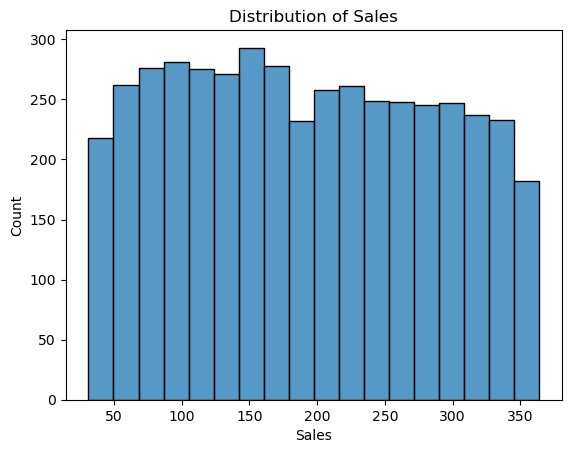

In [11]:
sb.histplot(data=budget_df,x='Sales').set(title='Distribution of Sales')

#### What these graphs have shown:
We see that **TV Marketing has the largest budget** with a fluctuation in funding all the way up to 100 million. We also see that **Radio Marketing has the highest concentration between 10-20 million**, and **Social Media ads tend to not receive more that 6 million**. We can also see that there is an **even distribution in the Influencers** associated with each ad. **Sales also don't seem to have any specific pattern, and have a near uniform distribution**

#### Next, let's see how these Budgets Correlate With Sales

[Text(0.5, 1.0, 'TV Budget vs. Sales')]

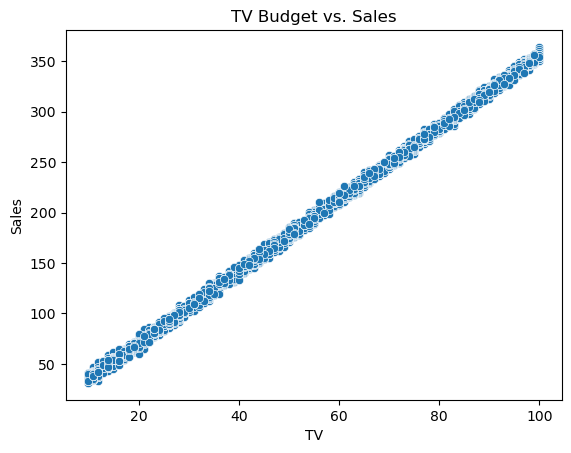

In [12]:
sb.scatterplot(data=budget_df,x='TV',y='Sales').set(title='TV Budget vs. Sales')

[Text(0.5, 1.0, 'Radio Budget vs. Sales')]

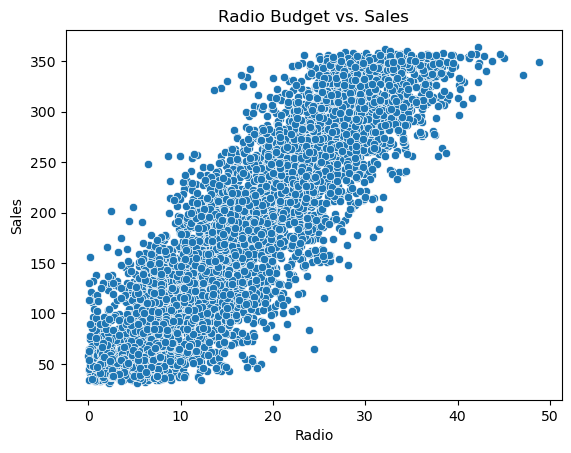

In [13]:
sb.scatterplot(data=budget_df,x='Radio',y='Sales').set(title='Radio Budget vs. Sales')

[Text(0.5, 1.0, 'Social Media Budget vs. Sales')]

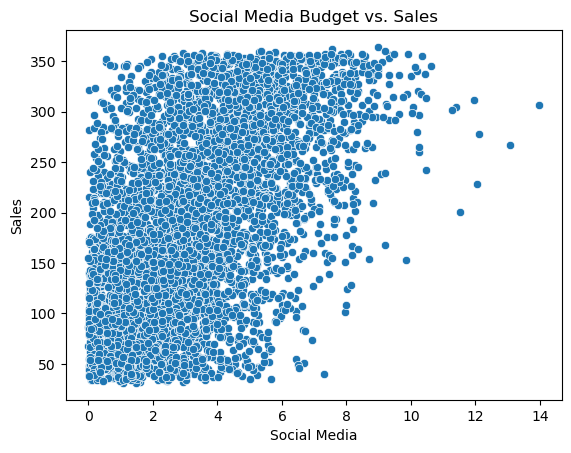

In [14]:
sb.scatterplot(data=budget_df,x='Social Media',y='Sales').set(title='Social Media Budget vs. Sales')

####  What these graphs have shown:
From these plots we can see that the budget that **TV advertisements receive has a strong positive correlation with sales**, meaning that the more money allocated to marketing through TV results in higher sales. 

The **Radio Budget also has a positive correlation with sales, though it is not as strong as TV's**, meaning that Radio has influence to raise sales but not as much as TV. 

However, the **Social Media Budget does not show correlation at all to sales**, and does not seem to have an influence on whether or not sales increase or decrease.

#### Replotting with Hues
We're going to replot the TV and Radio scatterplots due to their correlation to Sales and see if adding color based on Influencer can show us if any Influencer is having better results

[Text(0.5, 1.0, '(TV Budget vs. Sales) By Influencer')]

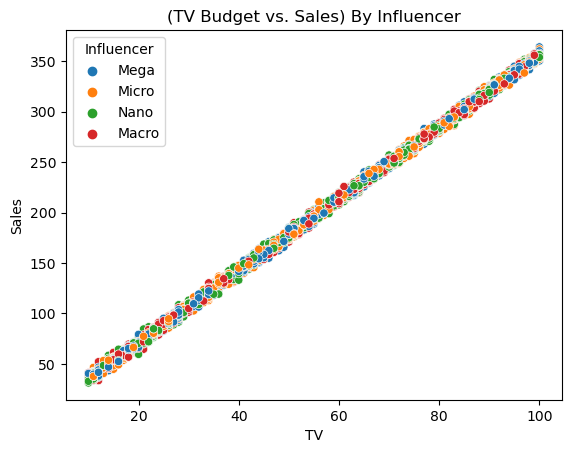

In [15]:
sb.scatterplot(data=budget_df,x='TV',y='Sales',hue='Influencer').set(title='(TV Budget vs. Sales) By Influencer')

[Text(0.5, 1.0, '(Radio Budget vs. Sales) By Influencer')]

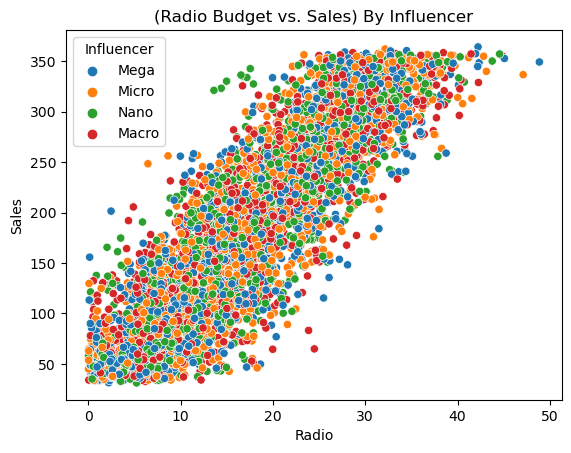

In [16]:
sb.scatterplot(data=budget_df,x='Radio',y='Sales',hue='Influencer').set(title='(Radio Budget vs. Sales) By Influencer')

#### What these graphs have shown:
The **inclusion of color based on Influencer turned out to be inconclusive**, and actually made our plots more noisy. Sometimes, the inclusion of more data can mask answers!

### Takeaways:

We have learned that **TV advertisements have the highest positive correlation with sales** and should be the primary target for budget allocation. We have also discovered that **Social Media advertisements don't have much effect on sales**, and that money might be better off allocated elsewhere, like Radio or TV. Finally, we've learned that the **Influencer associated with the advertisement doesn't change its impact on sales.**